In [247]:
import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df_standard = pd.read_csv('2016_standard.csv')
df_ppr = pd.read_csv('2016_ppr.csv')

In [4]:
df_standard.head()

,Rank,Name,Team,ByeWeek,Age,Position,PositionRank,Week1ADP,Week2ADP,Week3ADP,HighestADP,LowestADP,AverageDraftPosition
0,1,Antonio Brown,PIT,8,34.0,WR,WR1,NaN,NaN,NaN,NaN,NaN,1.3
1,2,Todd Gurley II,LAR,8,28.0,RB,RB1,NaN,NaN,NaN,NaN,NaN,2.4
2,3,Julio Jones,ATL,11,34.0,WR,WR2,133.5,133.5,133.5,133.5,133.5,3.3
3,4,Odell Beckham Jr.,NYG,8,30.0,WR,WR3,NaN,NaN,NaN,NaN,NaN,4.0
4,5,David Johnson,ARI,9,31.0,RB,RB2,NaN,NaN,NaN,NaN,NaN,5.4


In [5]:
df_ppr.head()

,Rank,Name,Team,ByeWeek,Age,Position,PositionRank,Week1ADP,Week2ADP,Week3ADP,HighestADP,LowestADP,AverageDraftPositionPPR
0,1,Antonio Brown,PIT,8,34.0,WR,WR1,NaN,NaN,NaN,NaN,NaN,1.2
1,2,Julio Jones,ATL,11,34.0,WR,WR2,121.0,121.0,121.0,121.0,121.0,2.8
2,3,Odell Beckham Jr.,NYG,8,30.0,WR,WR3,NaN,NaN,NaN,NaN,NaN,3.4
3,3,David Johnson,ARI,9,31.0,RB,RB1,NaN,NaN,NaN,NaN,NaN,3.4
4,5,Todd Gurley II,LAR,8,28.0,RB,RB2,NaN,NaN,NaN,NaN,NaN,6.3


In [6]:
df = df_standard[['Name','Team','AverageDraftPosition']].merge(df_ppr[['Name','Team','AverageDraftPositionPPR']]
                                                          ,left_on=['Name','Team'],right_on=['Name','Team'])

In [7]:
df['year'] = 2016

In [8]:
df.head()

,Name,Team,AverageDraftPosition,AverageDraftPositionPPR,year
0,Antonio Brown,PIT,1.3,1.2,2016
1,Todd Gurley II,LAR,2.4,6.3,2016
2,Julio Jones,ATL,3.3,2.8,2016
3,Odell Beckham Jr.,NYG,4.0,3.4,2016
4,David Johnson,ARI,5.4,3.4,2016


In [9]:
standard = ['2016_standard.csv','2017_standard.csv','2018_standard.csv','2019_standard.csv','2020_standard.csv',
           '2021_standard.csv','2022_standard.csv']
ppr = ['2016_ppr.csv','2017_ppr.csv','2018_ppr.csv','2019_ppr.csv','2020_ppr.csv',
           '2021_ppr.csv','2022_ppr.csv']

In [10]:
seasons = range(2016,2023)
a = []
for seas,stand,p in zip(seasons,standard,ppr):
    df0 = pd.read_csv(stand,index_col=0)
    df1 = pd.read_csv(p,index_col=0)
    df = df0[['Name','Team','AverageDraftPosition']].merge(df1[['Name','Team','AverageDraftPositionPPR']]
                                                          ,left_on=['Name','Team'],right_on=['Name','Team'])
    df['year'] = seas
    a.append(df)

# Merge Season Data with ADP

In [11]:
df_adp = pd.read_csv('adp.csv',index_col=0)
df_adp.Name = df_adp.Name.str.replace(' II','').str.replace('GordonI','Gordon').str.strip()
df_adp = df_adp.reset_index(drop=True)

df = pd.read_csv('ffb_df.csv',index_col=0)
df.Player = df.Player.str.replace('*','').str.replace('+','').str.strip()

/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_18869/845162919.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.Player = df.Player.str.replace('*','').str.replace('+','').str.strip()


In [12]:
seasons = range(2016,2023)
new_list = []
for s in seasons:
    list1 = df_adp[df_adp.year==s][['Name']].sort_values('Name')['Name'].tolist()
    list2 = df[df.year==s][['Player']].sort_values('Player')['Player'].tolist()
    player = pd.DataFrame({'player':(list(set(list1).intersection(list2)))})
    comb1 = player.merge(df[df.year==s],left_on=['player'],right_on=['Player'])
    comb2 = comb1.merge(df_adp[df_adp.year==s],left_on=['player'],right_on=['Name'])
    new_list.append(comb2)

In [13]:
test = pd.concat(new_list)
test = test.reset_index(drop=True)
to_drop = ['Player','2:00 PM','2PP','DKPt','FDPt','OvRank','-9999','Name','Team','year_y']
test = test.drop(to_drop,axis=1).copy()

cols = ['player','rk','team','pos','age','g','gs','cmp','pass_att','pass_yds','pass_tds','int','rush_att','rush_yard',
       'y/a','rush_tds','tgt','rec','rec_yards','y/r','rec_tds','fmb','fl','rush_rec_tds','standard_pts','ppr_pts',
       'vbd','pos_rank','year','avg_draft_pos','avg_draft_pos_ppr']

test.columns = cols

test[['y/a','y/r','fmb','standard_pts','ppr_pts','vbd']] = test[['y/a','y/r','fmb','standard_pts','ppr_pts','vbd']].fillna(0)
test = test.dropna()
test = test.drop_duplicates(['player','year'])
test = test.drop(index=[1973])
test.loc[test[test.avg_draft_pos_ppr>350].index,'avg_draft_pos_ppr'] = 350
test.loc[test[test.avg_draft_pos>350].index,'avg_draft_pos'] = 350
test.to_csv('season.csv')

# Exploration

In [138]:
df = pd.read_csv('season.csv',index_col=0)
df = df.sort_values('year').reset_index(drop=True)

In [142]:
df[(df.year==2016) & (df.pos=='RB')].sort_values('pos_rank')

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr
218,David Johnson,1,ARI,RB,25,16,16,0.0,0.0,0.0,0.0,0.0,293.0,1239.0,4.23,16.0,120.0,80.0,879.0,10.99,4.0,5.0,3.0,20,328.0,407.8,191.0,1,2016,5.4,3.4
311,Ezekiel Elliott,2,DAL,RB,21,15,15,0.0,0.0,0.0,0.0,0.0,322.0,1631.0,5.07,15.0,39.0,32.0,363.0,11.34,1.0,5.0,1.0,16,293.0,325.4,156.0,2,2016,6.3,8.3
280,LeSean McCoy,4,BUF,RB,28,15,15,0.0,0.0,0.0,0.0,0.0,234.0,1267.0,5.41,13.0,57.0,50.0,356.0,7.12,1.0,3.0,0.0,14,248.0,298.3,111.0,3,2016,19.7,22.0
155,Le'Veon Bell,5,PIT,RB,24,12,12,0.0,1.0,0.0,0.0,0.0,261.0,1268.0,4.86,7.0,94.0,75.0,616.0,8.21,2.0,4.0,1.0,9,242.0,317.4,105.0,4,2016,10.1,12.3
59,DeMarco Murray,6,TEN,RB,28,16,16,1.0,2.0,10.0,1.0,0.0,293.0,1287.0,4.39,9.0,67.0,53.0,377.0,7.11,3.0,3.0,1.0,12,241.0,293.8,104.0,5,2016,36.5,40.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Raheem Mostert,511,2TM,RB,24,3,0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,6.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,1.0,0.6,0.0,154,2016,350.0,350.0
399,Rod Smith,567,DAL,RB,24,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,4.0,4.00,0.0,0.0,0.0,0,0.0,1.4,0.0,158,2016,350.0,350.0
392,Marcus Murphy,556,NOR,RB,25,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,3.0,3.00,0.0,0.0,0.0,0,0.0,1.3,0.0,159,2016,350.0,350.0
343,Khiry Robinson,562,NYJ,RB,27,1,0,0.0,0.0,0.0,0.0,0.0,8.0,22.0,2.75,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,0,0.0,0.2,0.0,160,2016,242.0,255.0


### What percent of top x final ppr points by position each season and for all seasons

In [14]:
df = pd.read_csv('season.csv',index_col=0)

In [18]:
def print_pos(df,pos,year,limit):
    print(df[(df.year==year) & (df.pos==pos)][['player','pos','standard_pts','ppr_pts']].sort_values('ppr_pts',ascending=False).head(limit))
    
def top_players_by_pos(yr,limit):
    print(df[df.year==yr][['pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(limit).groupby('pos').count()/limit)
    
def print_top_ppr(season,limit):
    print(df[df.year==season][['player','pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(limit))

In [46]:
def proportion_of_pos(df):

    num = [3,6,12,18,24,30,36,42,48,54,60,66,72]

    qb = []
    wr = []
    rb = []
    te = []
    li = [qb,rb,wr,te]
    pos = ['QB','RB','WR','TE']

    for n in range(3,72,3):
        d = df[['pos','ppr_pts']].sort_values(by='ppr_pts',ascending=False).head(n).\
        groupby('pos').count()/n
        for p,l in zip(pos,li):
            try:
                l.append(d.loc[p,'ppr_pts'])
            except:
                l.append(0)
                
    return pd.DataFrame({'n':range(3,72,3),'qb':qb,'rb':rb,'wr':wr,'te':te})

2016


<Figure size 1440x720 with 0 Axes>

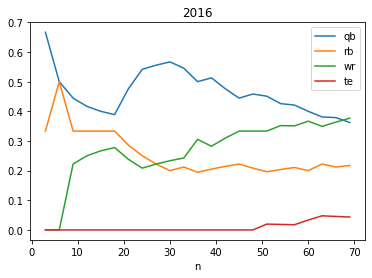

2017


<Figure size 1440x720 with 0 Axes>

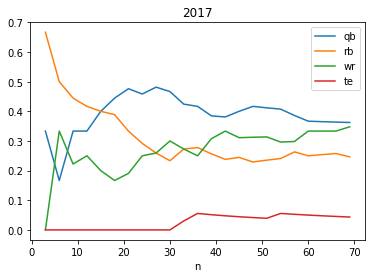

2018


<Figure size 1440x720 with 0 Axes>

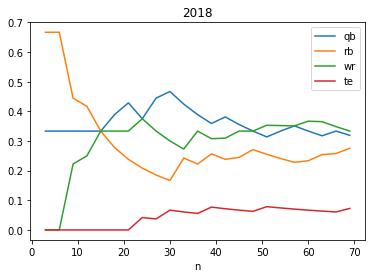

2019


<Figure size 1440x720 with 0 Axes>

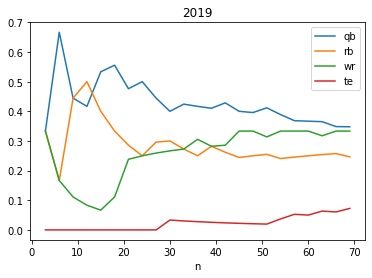

2020


<Figure size 1440x720 with 0 Axes>

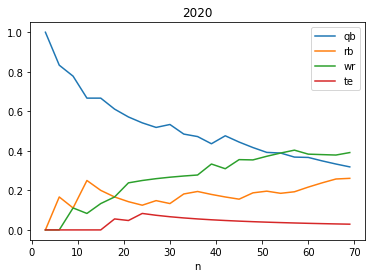

2021


<Figure size 1440x720 with 0 Axes>

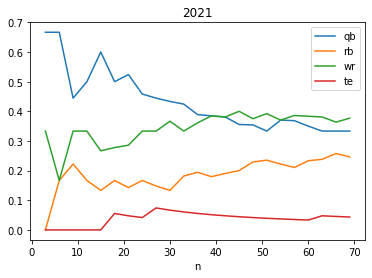

2022


<Figure size 1440x720 with 0 Axes>

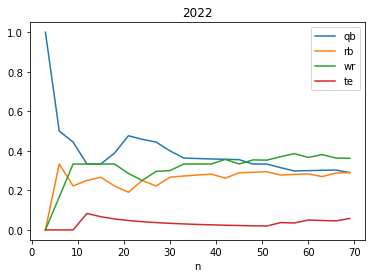

In [48]:
for s in seasons:
    g = proportion_of_pos(df[df.year==s])
    print(s)
    plt.figure(figsize=(20,10))
    g.plot(x='n')
    plt.title(s)
    plt.show()

<Figure size 1440x720 with 0 Axes>

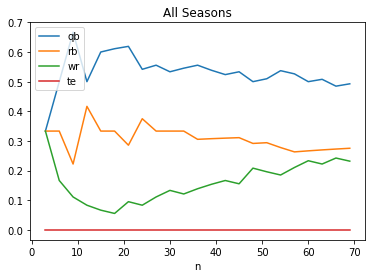

In [49]:
g = proportion_of_pos(df)
plt.figure(figsize=(20,10))
g.plot(x='n')
plt.title('All Seasons')
plt.show()

In [137]:
df[df.year==2016]

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr,target
0,Kapri Bibbs,290,DEN,RB,23,12,0,0.0,0.0,0.0,0.0,0.0,29.0,129.0,4.45,0.0,4.0,2.0,75.0,37.50,1.0,0.0,0.0,1,26.0,28.4,0.0,84,2016,350.0,350.0,40.7
1,James White,126,NWE,RB,24,16,4,0.0,0.0,0.0,0.0,0.0,39.0,166.0,4.26,0.0,86.0,60.0,551.0,9.18,5.0,0.0,0.0,5,102.0,161.7,0.0,35,2016,114.3,90.9,134.0
2,Allen Hurns,188,JAX,WR,25,11,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,76.0,35.0,477.0,13.63,3.0,1.0,0.0,3,66.0,100.7,0.0,75,2016,65.8,65.5,99.4
3,Jaelen Strong,368,HOU,WR,22,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,24.0,14.0,131.0,9.36,0.0,0.0,0.0,0,13.0,27.1,0.0,142,2016,217.0,201.0,12.8
4,Andy Dalton,75,CIN,QB,29,16,16,364.0,563.0,4206.0,18.0,8.0,46.0,184.0,4.00,4.0,0.0,0.0,0.0,0.00,0.0,9.0,3.0,4,261.0,260.6,0.0,12,2016,128.8,132.7,210.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Tyreek Hill,34,KAN,WR,22,16,1,0.0,0.0,0.0,0.0,0.0,24.0,267.0,11.13,3.0,83.0,61.0,593.0,9.72,6.0,4.0,1.0,12,156.0,217.0,30.0,11,2016,350.0,350.0,245.2
470,Jay Ajayi,19,MIA,RB,23,15,12,0.0,0.0,0.0,0.0,0.0,260.0,1272.0,4.89,8.0,35.0,27.0,151.0,5.59,0.0,4.0,1.0,8,188.0,215.3,51.0,11,2016,99.3,111.3,135.1
471,C.J. Uzomah,279,CIN,TE,23,10,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,38.0,25.0,234.0,9.36,1.0,0.0,0.0,1,29.0,54.4,0.0,44,2016,350.0,350.0,25.2
472,John Brown,191,ARI,WR,26,15,6,0.0,0.0,0.0,0.0,0.0,1.0,10.0,10.00,0.0,73.0,39.0,517.0,13.26,2.0,1.0,0.0,2,65.0,103.7,0.0,77,2016,78.3,78.3,69.9


# Add success columns

We need to add a 'success' column. If a player is drafted top 6 by their position, to be a 'success' they need to finish in the top 6. If they're drafted between 6-36 by their position they're final position ranking needs to beat their positional adp to be a success. Anybody who is drafted outside of the top 36 is a success if they finish in the top 36

In [326]:
df = pd.read_csv('season.csv',index_col=0)

seasons = range(2016,2023)
positions = ['QB','RB','WR','TE']
add = []

for s in seasons:
    for p in positions:
        test = df[(df.year==s)&(df.pos==p)].sort_values('avg_draft_pos_ppr').reset_index(drop=True)
        test['adp_by_pos'] = test.index+1
        
        test = test[(test.year==s)&(test.pos==p)].sort_values('ppr_pts',ascending=False).reset_index(drop=True)
        test['pos_rank'] = test.index+1
        
        add.append(test)

df = pd.concat(add).reset_index(drop=True)

# Add 'success' column
for i in range(0,len(df.index)):
    if df.loc[i,'pos'] =='QB' or df.loc[i,'pos'] =='TE':
        
        if df.loc[i, 'adp_by_pos'] <= 3:
            if df.loc[i,'pos_rank'] <= 3:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        else:
            if df.loc[i,'pos_rank']<=12:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

    else:
        if df.loc[i, 'adp_by_pos'] <= 6:
            if df.loc[i,'pos_rank'] <= 6:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        elif df.loc[i, 'adp_by_pos'] > 36:
            if df.loc[i,'pos_rank'] < 36:
                df.loc[i,'success'] = 1
            else:
                df.loc[i, 'success'] = 0

        else:
            if df.loc[i,'pos_rank'] <= df.loc[i,'adp_by_pos']:
                df.loc[i, 'success'] = 1
            else:
                df.loc[i, 'success'] = 0
        
# Add 'round' columns
for i in range(0,len(df.index)):
    if df.loc[i,'avg_draft_pos_ppr'] <= 12:
        df.loc[i, 'round'] = 1
    elif df.loc[i,'avg_draft_pos_ppr'] <= 24:
        df.loc[i, 'round'] = 2
    elif df.loc[i,'avg_draft_pos_ppr'] <= 36:
        df.loc[i, 'round'] = 3
    elif df.loc[i,'avg_draft_pos_ppr'] <= 48:
        df.loc[i, 'round'] = 4
    elif df.loc[i,'avg_draft_pos_ppr'] <= 60:
        df.loc[i, 'round'] = 5
    elif df.loc[i,'avg_draft_pos_ppr'] <= 72:
        df.loc[i, 'round'] = 6
    elif df.loc[i,'avg_draft_pos_ppr'] <= 84:
        df.loc[i, 'round'] = 7
    elif df.loc[i,'avg_draft_pos_ppr'] <= 96:
        df.loc[i, 'round'] = 8
    elif df.loc[i,'avg_draft_pos_ppr'] <= 108:
        df.loc[i, 'round'] = 9
    elif df.loc[i,'avg_draft_pos_ppr'] <= 120:
        df.loc[i, 'round'] = 10
    elif df.loc[i,'avg_draft_pos_ppr'] <= 132:
        df.loc[i, 'round'] = 11
    elif df.loc[i,'avg_draft_pos_ppr'] <= 144:
        df.loc[i, 'round'] = 12
    elif df.loc[i,'avg_draft_pos_ppr'] <= 156:
        df.loc[i, 'round'] = 13
    elif df.loc[i,'avg_draft_pos_ppr'] <= 168:
        df.loc[i, 'round'] = 14
    else:
        df.loc[i, 'round'] = 15

### Successful percentage by round

In [327]:
rounds = range(1,16)
seasons = range(2016,2023)
pos = ['QB','RB','WR','TE']
qb = []
rb = []
wr = []
te = []
ro = []
pos_name = [qb,rb,wr,te]

for s in seasons:
    df1 = df[df.year==s]
    for r in rounds:
        ro.append(r)
        for p,n in zip(pos,pos_name):
            if df1[(df1['round']==r) & (df1.pos==p)].success.count() == 0:
                n.append(0)
                
            else:
                n.append(df1[(df1['round']==r) & (df1.pos==p)].success.sum()/df1[(df1['round']==r) & (df1.pos==p)].success.count())
               

year = []
for s in seasons:
    for r in rounds:
        year.append(s)
        
df_success = pd.DataFrame({'season':year,'qb':qb,'rb':rb,'wr':wr,'te':te,'rounds':ro})

In [336]:
df_success

,season,qb,rb,wr,te,rounds
0,2016,0.000000,0.400000,0.500000,0.000000,1
1,2016,0.000000,0.600000,0.375000,0.000000,2
2,2016,0.000000,0.666667,0.666667,0.000000,3
3,2016,1.000000,0.200000,0.200000,0.000000,4
4,2016,0.500000,0.250000,0.333333,1.000000,5
...,...,...,...,...,...,...
100,2022,0.000000,0.400000,0.166667,0.000000,11
101,2022,1.000000,0.000000,0.000000,0.000000,12
102,2022,0.000000,1.000000,0.333333,0.250000,13
103,2022,0.000000,0.000000,0.000000,0.000000,14


In [343]:
df[(df.pos=='QB')&(df['round']==2)]

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr,adp_by_pos,success,round
501,Aaron Rodgers,96,GNB,QB,34,7,7,154.0,238.0,1675.0,16.0,6.0,24.0,126.0,5.25,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0,130.0,129.6,0.0,28,2017,19.8,23.4,1,0.0,2.0
1505,Patrick Mahomes,48,KAN,QB,24,14,14,319.0,484.0,4031.0,26.0,5.0,43.0,218.0,5.07,2.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,2,287.0,287.0,23.0,7,2019,16.4,19.3,1,0.0,2.0
2004,Patrick Mahomes,10,KAN,QB,25,15,15,390.0,588.0,4740.0,38.0,6.0,62.0,308.0,4.97,2.0,2.0,0.0,0.0,0.0,0.0,5.0,2.0,2,374.0,374.4,92.0,4,2020,10.3,18.7,1,0.0,2.0
2009,Lamar Jackson,30,BAL,QB,23,15,15,242.0,376.0,2757.0,26.0,9.0,159.0,1005.0,6.32,7.0,0.0,0.0,0.0,0.0,0.0,10.0,4.0,7,333.0,332.8,50.0,9,2020,18.1,22.7,2,0.0,2.0
2528,Patrick Mahomes,13,KAN,QB,26,17,17,436.0,658.0,4839.0,37.0,13.0,66.0,381.0,5.77,2.0,0.0,0.0,0.0,0.0,0.0,9.0,4.0,2,362.0,361.7,88.0,4,2021,14.7,19.8,1,0.0,2.0
3046,Josh Allen,7,BUF,QB,26,16,16,359.0,567.0,4283.0,35.0,14.0,124.0,762.0,6.15,7.0,0.0,0.0,0.0,0.0,0.0,13.0,5.0,7,396.0,395.5,117.0,2,2022,17.0,19.1,1,1.0,2.0


In [344]:
gr = df_success.groupby('rounds').mean()[['qb','rb','wr','te']]

In [347]:
plt.

,qb,rb,wr,te
rounds,,,,
1,0.000000,0.372222,0.559524,0.142857
2,0.142857,0.523810,0.398810,0.571429
3,0.214286,0.324150,0.454762,0.214286
4,0.428571,0.226190,0.465306,0.571429
5,0.214286,0.300000,0.369048,0.333333
6,0.595238,0.403061,0.290476,0.642857
7,0.333333,0.597619,0.440476,0.500000
8,0.619048,0.335714,0.392857,0.357143
9,0.500000,0.330952,0.476190,0.500000


In [328]:
df_success.head(50)

,season,qb,rb,wr,te,rounds
0,2016,0.000000,0.400000,0.500000,0.000000,1
1,2016,0.000000,0.600000,0.375000,0.000000,2
2,2016,0.000000,0.666667,0.666667,0.000000,3
3,2016,1.000000,0.200000,0.200000,0.000000,4
4,2016,0.500000,0.250000,0.333333,1.000000,5
5,2016,0.333333,0.000000,0.500000,1.000000,6
6,2016,0.000000,0.200000,0.500000,0.000000,7
7,2016,0.500000,0.500000,0.500000,1.000000,8
8,2016,0.500000,0.750000,0.200000,0.500000,9
9,2016,1.000000,1.000000,0.200000,0.500000,10


In [278]:
df[(df['round']==1) & (df.pos=='QB')].success.sum()/df[(df['round']==1) & (df.pos=='RB')].success.count()

0.0

In [279]:
df[(df['round']==1) & (df.pos=='RB')].success.sum()/df[(df['round']==1) & (df.pos=='RB')].success.count()

0.37037037037037035

In [280]:
df[(df['round']==1) & (df.pos=='WR')].success.sum()/df[(df['round']==1) & (df.pos=='RB')].success.count()

0.24074074074074073

In [281]:
df[(df['round']==1) & (df.pos=='TE')].success.sum()/df[(df['round']==1) & (df.pos=='RB')].success.count()

0.018518518518518517

# Start Modeling

In [146]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [118]:
def plot_residuals(y,yhat):
    '''
    y is the variable you're using to make your prediction
    yhat is the residual from your predictions
    '''
    import matplotlib.pyplot as plt
    res = yhat-y
    plt.scatter(y,res)
    plt.show()  

In [103]:
df = pd.read_csv('season.csv',index_col=0)
df = df.sort_values('year').reset_index(drop=True)

def add_target(group):
    group["target"] = group["ppr_pts"].shift(-1)
    return group

df = df.groupby('player').apply(add_target)

In [104]:
train = df[df.year<2020].dropna()
val = df[(df.year>2019) & (df.year<=2021)].dropna()
test = df[df.year==2022]

In [300]:
train

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr,target
0,Kapri Bibbs,290,DEN,RB,23,12,0,0.0,0.0,0.0,0.0,0.0,29.0,129.0,4.45,0.0,4.0,2.0,75.0,37.50,1.0,0.0,0.0,1,26.0,28.4,0.0,84,2016,350.0,350.0,40.7
1,James White,126,NWE,RB,24,16,4,0.0,0.0,0.0,0.0,0.0,39.0,166.0,4.26,0.0,86.0,60.0,551.0,9.18,5.0,0.0,0.0,5,102.0,161.7,0.0,35,2016,114.3,90.9,134.0
2,Allen Hurns,188,JAX,WR,25,11,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,76.0,35.0,477.0,13.63,3.0,1.0,0.0,3,66.0,100.7,0.0,75,2016,65.8,65.5,99.4
3,Jaelen Strong,368,HOU,WR,22,8,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,24.0,14.0,131.0,9.36,0.0,0.0,0.0,0,13.0,27.1,0.0,142,2016,217.0,201.0,12.8
4,Andy Dalton,75,CIN,QB,29,16,16,364.0,563.0,4206.0,18.0,8.0,46.0,184.0,4.00,4.0,0.0,0.0,0.0,0.00,0.0,9.0,3.0,4,261.0,260.6,0.0,12,2016,128.8,132.7,210.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Alex Armah,408,CAR,RB,25,16,1,0.0,0.0,0.0,0.0,0.0,6.0,11.0,1.83,1.0,2.0,2.0,6.0,3.00,0.0,0.0,0.0,1,8.0,9.7,0.0,112,2019,350.0,350.0,7.7
1996,Justice Hill,242,BAL,RB,22,16,0,0.0,0.0,0.0,0.0,0.0,58.0,225.0,3.88,2.0,15.0,8.0,70.0,8.75,0.0,0.0,0.0,2,42.0,49.5,0.0,71,2019,118.8,120.7,13.0
1997,Colt McCoy,456,WAS,QB,33,1,1,18.0,27.0,122.0,0.0,1.0,2.0,14.0,7.00,0.0,0.0,0.0,0.0,0.00,0.0,2.0,0.0,0,4.0,4.3,0.0,58,2019,350.0,350.0,18.2
1998,Isaiah McKenzie,264,BUF,WR,24,15,8,0.0,0.0,0.0,0.0,0.0,8.0,49.0,6.13,0.0,39.0,27.0,254.0,9.41,1.0,0.0,0.0,1,36.0,63.3,0.0,100,2019,232.0,237.0,99.6


In [105]:
X_train = train.select_dtypes(['int','float']).drop(['rk','standard_pts',
                                                     'ppr_pts','avg_draft_pos','year','target'],axis=1)
y_train = train.target
X_val = val.select_dtypes(['int','float']).drop(['rk','standard_pts',
                                                 'ppr_pts','avg_draft_pos','year','target'],axis=1)
y_val = val.target
X_test = test.select_dtypes(['int','float']).drop(['rk','standard_pts',
                                                   'ppr_pts','avg_draft_pos','year','target'],axis=1)
y_test = test.target

In [101]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



In [252]:
# Import necessary libraries
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Load your dataset here
# X, y = load_data()

# Define the linear regression model
lin_reg = LinearRegression()

# Define the hyperparameters to tune
parameters = {'fit_intercept': [True, False], 'normalize': [True, False]}

# Define the grid search with cross-validation
grid_search = GridSearchCV(lin_reg, parameters, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and their corresponding mean squared error
print("Best parameters: ", grid_search.best_params_)
print("Best mean squared error: ", -grid_search.best_score_)


Best parameters:  {'fit_intercept': True, 'normalize': False}
Best mean squared error:  4078.6071839331917


In [254]:
lin_reg = LinearRegression({'fit_intercept': True, 'normalize': False})

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass fit_intercept={'fit_intercept': True, 'normalize': False} as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [257]:
lin_reg.fit(X_train,y_train)
print('ls','train',mean_squared_error(ls.predict(X_train),y_train)**.5)
print('ls','validate',mean_squared_error(ls.predict(X_val),y_val)**.5)
print('\n')

ls train 61.288033597916915
ls validate 59.54485511035076




In [265]:
test

,player,rk,team,pos,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,standard_pts,ppr_pts,vbd,pos_rank,year,avg_draft_pos,avg_draft_pos_ppr,adp_by_pos
0,Travis Kelce,8,KAN,TE,33,17,17,0.0,0.0,0.0,0.0,0.0,2.0,5.0,2.50,0.0,152.0,110.0,1338.0,12.16,12.0,1.0,1.0,12,206.0,316.3,114.0,1,2022,16.1,16.6,1
1,T.J. Hockenson,29,2TM,TE,25,17,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,129.0,86.0,914.0,10.63,6.0,1.0,1.0,6,129.0,215.4,42.0,2,2022,88.9,119.6,13
2,George Kittle,23,SFO,TE,29,15,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,86.0,60.0,765.0,12.75,11.0,1.0,1.0,11,141.0,200.5,52.0,3,2022,39.1,43.2,4
3,Mark Andrews,41,BAL,TE,27,15,15,0.0,0.0,0.0,0.0,0.0,3.0,8.0,2.67,0.0,113.0,73.0,847.0,11.60,5.0,1.0,0.0,5,118.0,190.5,30.0,4,2022,25.7,25.9,2
4,Evan Engram,51,JAX,TE,28,17,14,0.0,0.0,0.0,0.0,0.0,2.0,13.0,6.50,0.0,98.0,73.0,766.0,10.49,4.0,0.0,0.0,4,104.0,176.9,18.0,5,2022,321.0,312.0,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Jeremy Ruckert,549,NYJ,TE,22,9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,1.0,8.0,8.00,0.0,0.0,0.0,0,1.0,1.8,0.0,104,2022,350.0,350.0,84
104,Tommy Sweeney,552,BUF,TE,27,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,7.0,7.00,0.0,0.0,0.0,0,1.0,1.7,0.0,105,2022,350.0,350.0,59
105,Jacob Harris,539,LAR,TE,25,7,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,6.0,6.00,0.0,0.0,0.0,0,1.0,1.6,0.0,106,2022,350.0,350.0,56
106,Richard Rodgers,620,LAC,TE,30,10,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,4.0,1.0,4.0,4.00,0.0,0.0,0.0,0,0.0,1.4,0.0,107,2022,350.0,350.0,98


In [267]:
X_test

,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,vbd,pos_rank,avg_draft_pos_ppr,ppr_pt_preds
3045,26,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.0,8.0,141.0,17.63,0.0,0.0,0.0,0,0.0,147,350.0,28.608776
3046,24,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,3.0,3.00,0.0,1.0,0.0,0,0.0,212,350.0,30.009621
3047,27,2,2,38.0,58.0,402.0,2.0,2.0,4.0,5.0,1.25,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,0,0.0,54,350.0,48.216357
3048,23,17,2,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.00,1.0,16.0,11.0,103.0,9.36,2.0,1.0,0.0,3,0.0,49,350.0,42.644125
3049,28,17,17,0.0,0.0,0.0,0.0,0.0,213.0,1121.0,5.26,2.0,72.0,59.0,395.0,6.69,5.0,5.0,3.0,7,46.0,11,15.3,197.964864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,25,15,0,0.0,0.0,0.0,0.0,0.0,49.0,262.0,5.35,0.0,12.0,12.0,58.0,4.83,0.0,2.0,1.0,0,0.0,79,332.0,52.543324
3562,32,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,1.0,42.0,42.00,1.0,0.0,0.0,1,0.0,153,350.0,-5.175538
3563,23,11,11,0.0,0.0,0.0,0.0,0.0,192.0,861.0,4.48,4.0,40.0,28.0,143.0,5.11,0.0,3.0,3.0,4,0.0,36,1.4,159.263675
3564,23,16,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,65.0,42.0,391.0,9.31,2.0,0.0,0.0,2,0.0,31,350.0,66.438537


In [263]:
X_test[''] = lin_reg.predict(X_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 23 is different from 24)

In [260]:
X_test

,age,g,gs,cmp,pass_att,pass_yds,pass_tds,int,rush_att,rush_yard,y/a,rush_tds,tgt,rec,rec_yards,y/r,rec_tds,fmb,fl,rush_rec_tds,vbd,pos_rank,avg_draft_pos_ppr,ppr_pt_preds
3045,26,7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,15.0,8.0,141.0,17.63,0.0,0.0,0.0,0,0.0,147,350.0,28.608776
3046,24,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,3.0,3.00,0.0,1.0,0.0,0,0.0,212,350.0,30.009621
3047,27,2,2,38.0,58.0,402.0,2.0,2.0,4.0,5.0,1.25,0.0,0.0,0.0,0.0,0.00,0.0,1.0,1.0,0,0.0,54,350.0,48.216357
3048,23,17,2,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.00,1.0,16.0,11.0,103.0,9.36,2.0,1.0,0.0,3,0.0,49,350.0,42.644125
3049,28,17,17,0.0,0.0,0.0,0.0,0.0,213.0,1121.0,5.26,2.0,72.0,59.0,395.0,6.69,5.0,5.0,3.0,7,46.0,11,15.3,197.964864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3561,25,15,0,0.0,0.0,0.0,0.0,0.0,49.0,262.0,5.35,0.0,12.0,12.0,58.0,4.83,0.0,2.0,1.0,0,0.0,79,332.0,52.543324
3562,32,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,1.0,42.0,42.00,1.0,0.0,0.0,1,0.0,153,350.0,-5.175538
3563,23,11,11,0.0,0.0,0.0,0.0,0.0,192.0,861.0,4.48,4.0,40.0,28.0,143.0,5.11,0.0,3.0,3.0,4,0.0,36,1.4,159.263675
3564,23,16,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,65.0,42.0,391.0,9.31,2.0,0.0,0.0,2,0.0,31,350.0,66.438537


In [134]:
ls = LinearRegression()
ls.fit(X_train,y_train)
print('ls','train',mean_squared_error(ls.predict(X_train),y_train)**.5)
print('ls','validate',mean_squared_error(ls.predict(X_val),y_val)**.5)
print('\n')

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print('rf','train',mean_squared_error(rf.predict(X_train),y_train)**.5)
print('rf','validate',mean_squared_error(rf.predict(X_val),y_val)**.5)

print('\n')
r = Ridge()
r.fit(X_train,y_train)
print('ridge','train',mean_squared_error(r.predict(X_train),y_train)**.5)
print('ridge','validate',mean_squared_error(r.predict(X_val),y_val)**.5)

ls train 61.288033597916915
ls validate 59.54485511035076


rf train 23.72318261595272
rf validate 62.22998879193057


ridge train 61.28820838615911
ridge validate 59.54568939560213


In [128]:
x_preds = train[['player','pos']]
x_preds['actual_ppr_pts'] = y_train
x_preds['preds'] = ls.predict(X_train)
x_preds

/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_18869/1092205037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_preds['actual_ppr_pts'] = y_train
/var/folders/fz/0282wvb93rn0lm_p0nscw1sm0000gn/T/ipykernel_18869/1092205037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_preds['preds'] = ls.predict(X_train)


,player,pos,actual_ppr_pts,preds
0,Kapri Bibbs,RB,40.7,28.757218
1,James White,RB,134.0,146.097999
2,Allen Hurns,WR,99.4,107.333814
3,Jaelen Strong,WR,12.8,64.465155
4,Andy Dalton,QB,210.7,244.380329
...,...,...,...,...
1995,Alex Armah,RB,7.7,20.777407
1996,Justice Hill,RB,13.0,82.724074
1997,Colt McCoy,QB,18.2,20.017652
1998,Isaiah McKenzie,WR,99.6,68.403822


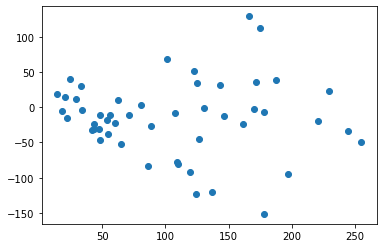

In [122]:
plot_residuals(x_preds.prediction,x_preds.actual)
